### Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. It is a critical step in the data science process, helping to understand the data better before making any assumptions or building models. EDA is about discovering patterns, spotting anomalies, testing hypotheses, and checking assumptions with the help of summary statistics and graphical representations.

#### Key steps in EDA include:

- Data Collection and Importing: Gathering the data from various sources and loading it into a data frame or similar structure.

- Data Cleaning: Handling missing values, correcting inconsistencies, and dealing with outliers.

- Descriptive Statistics: Calculating summary statistics like mean, median, mode, variance, standard deviation, etc.

- Data Visualization: Using plots such as histograms, box plots, scatter plots, bar charts, and heatmaps to visualize data distributions and relationships.

- Identifying Patterns and Trends: Looking for patterns, trends, and correlations within the data.

- Testing Hypotheses: Formulating and testing hypotheses about the data.

- Feature Engineering: Creating new features or modifying existing ones to better capture the underlying structure of the data.
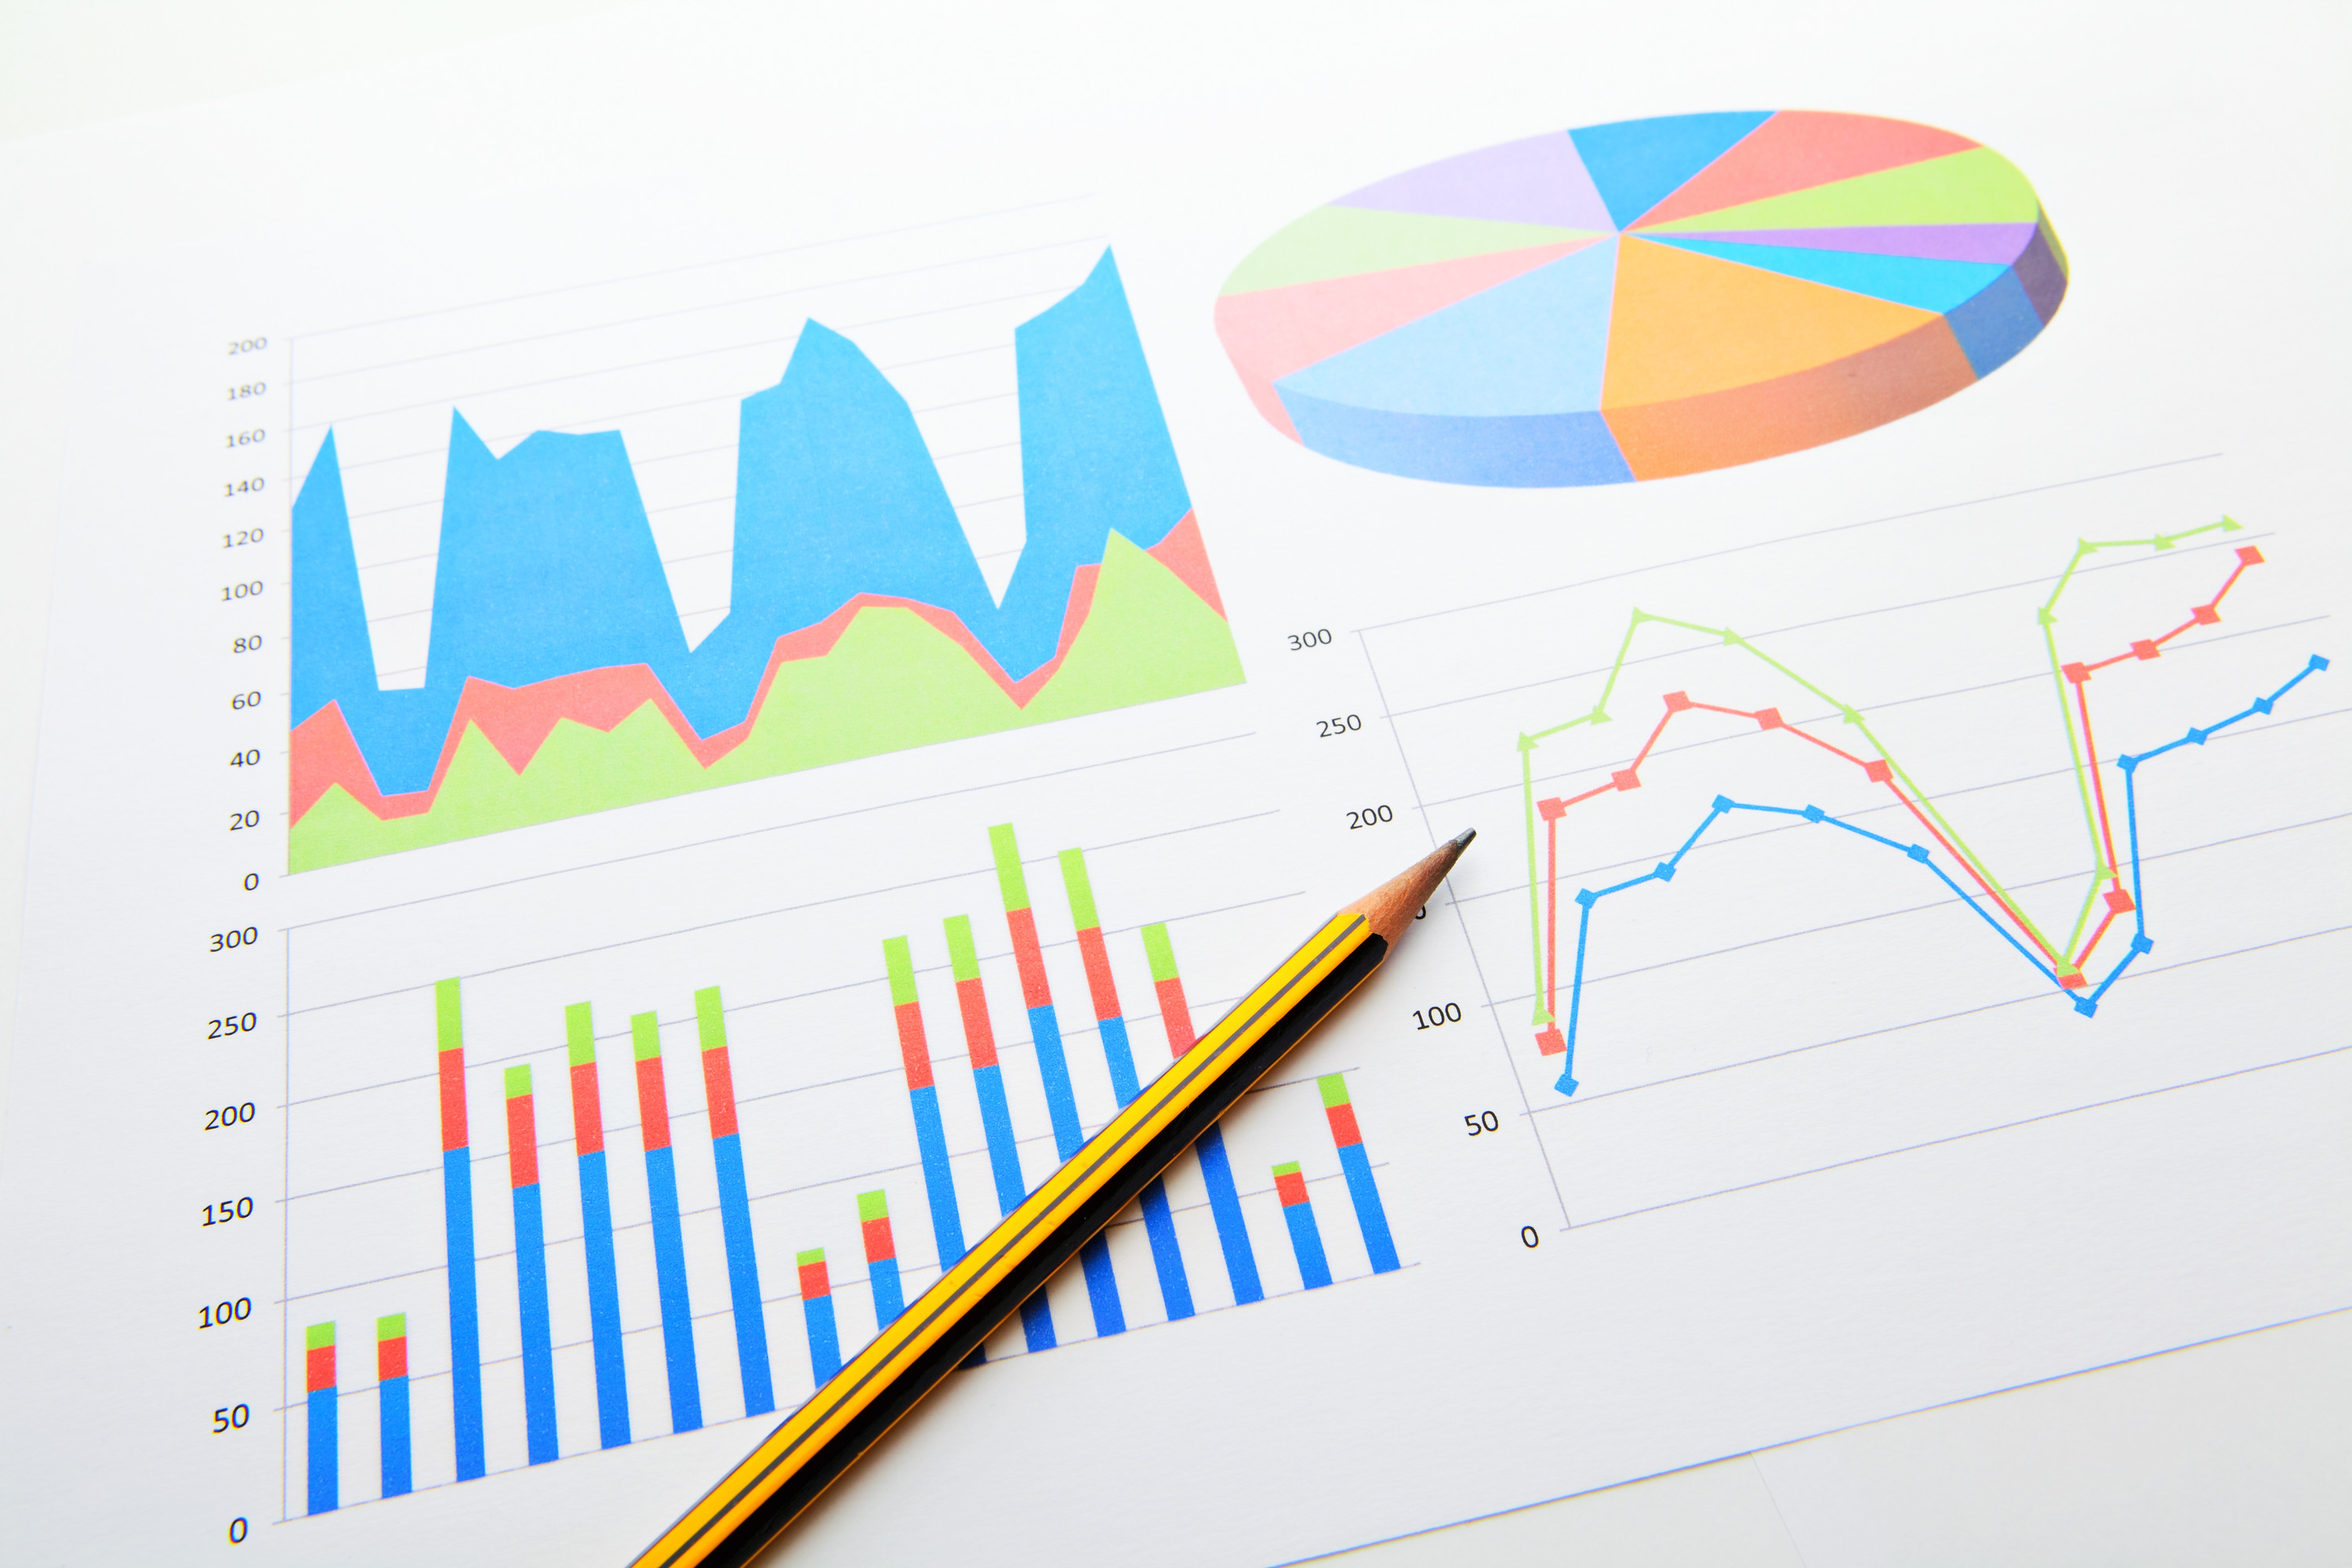
## Benefits of EDA:
- Better Understanding: Provides a deeper understanding of the dataset.
- Data Quality: Helps identify data quality issues.
- Informing Modeling: Guides the selection of appropriate modeling techniques.
- Hypothesis Generation: Generates hypotheses about the underlying mechanisms.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Load the movie review data
#movie_reviews = pd.read_csv("movie_reviews.csv")
movies_review = pd.read_csv("https://raw.githubusercontent.com/suyashi29/Generative-AI-for-NLP/main/movie_reviews.csv")

In [2]:
movies_review

Movie                                       Review  \
0                 Pulp Fiction         The special effects were incredible.   
1              The Dark Knight                 The film lacked originality.   
2                 Forrest Gump           The screenplay was poorly written.   
3                   Fight Club                            Predictable plot.   
4              The Dark Knight                        Disappointing ending.   
...                        ...                                          ...   
3995           The Dark Knight           The screenplay was poorly written.   
3996                Goodfellas                I didn't like the plot twist.   
3997  The Shawshank Redemption           The screenplay was poorly written.   
3998                The Matrix           The screenplay was poorly written.   
3999              Pulp Fiction  I found the movie boring and uninteresting.   

      Sentiment  
0             0  
1             1  
2             1  
3             0  
4             1  
...         ...  
3995          0  
3996          0  
3997          1  
3998          0  
3999          0  

[4000 rows x 3 columns]

In [3]:
# EDA
print("Summary Statistics:")
print(movies_review.describe())

Summary Statistics:
         Sentiment
count  4000.000000
mean      0.510000
std       0.499962
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000


In [4]:
print(movies_review.describe(include="object"))

             Movie                               Review
count         4000                                 4000
unique          10                                   20
top     Goodfellas  The movie was absolutely fantastic!
freq           435                                  224


In [5]:
# Count positive and negative sentiments
positive_count = movies_review[movies_review['Sentiment'] == 1].shape[0]
negative_count = movies_review[movies_review['Sentiment'] == 0].shape[0]
print(f'Positive Sentiments: {positive_count}')
print(f'Negative Sentiments: {negative_count}')

Positive Sentiments: 2040
Negative Sentiments: 1960


In [6]:
movies_review.isnull().sum()

Movie        0
Review       0
Sentiment    0
dtype: int64

In [7]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suyashi144893\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suyashi144893\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

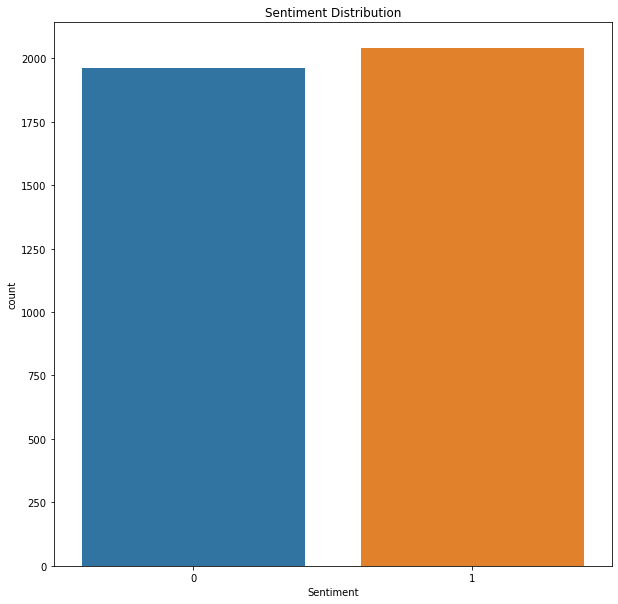

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
# Plot sentiment distribution
sns.countplot(x='Sentiment', data=movies_review)
plt.title('Sentiment Distribution')
plt.show()


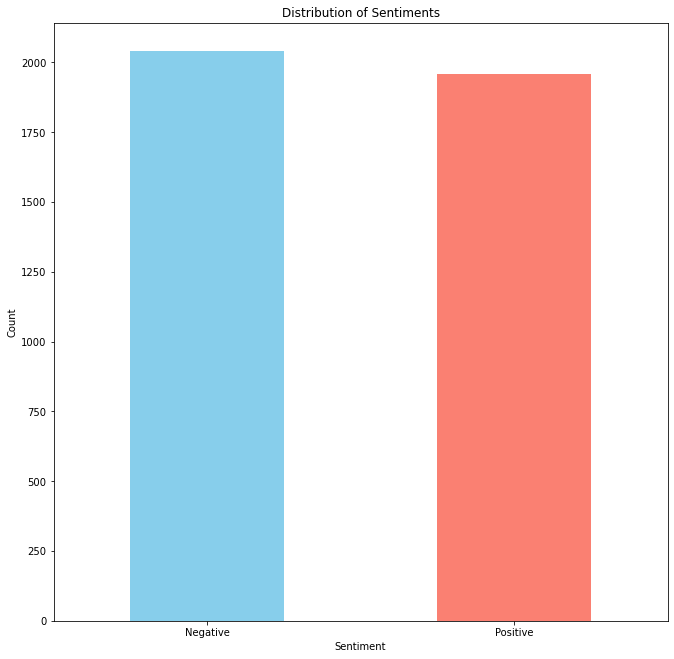

In [15]:
# Distribution of sentiments
plt.figure(figsize=(11, 11))
sentiment_counts = movies_review['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(range(len(sentiment_counts)), ['Negative', 'Positive'], rotation=0)
plt.show()

# Filter out empty reviews
#movies_review = movies_review.dropna(subset=['Review'])


[Good,Bad, Poor, Good, Bad, Fine]

Good-2
Bad-2
poor-1
Fine-1


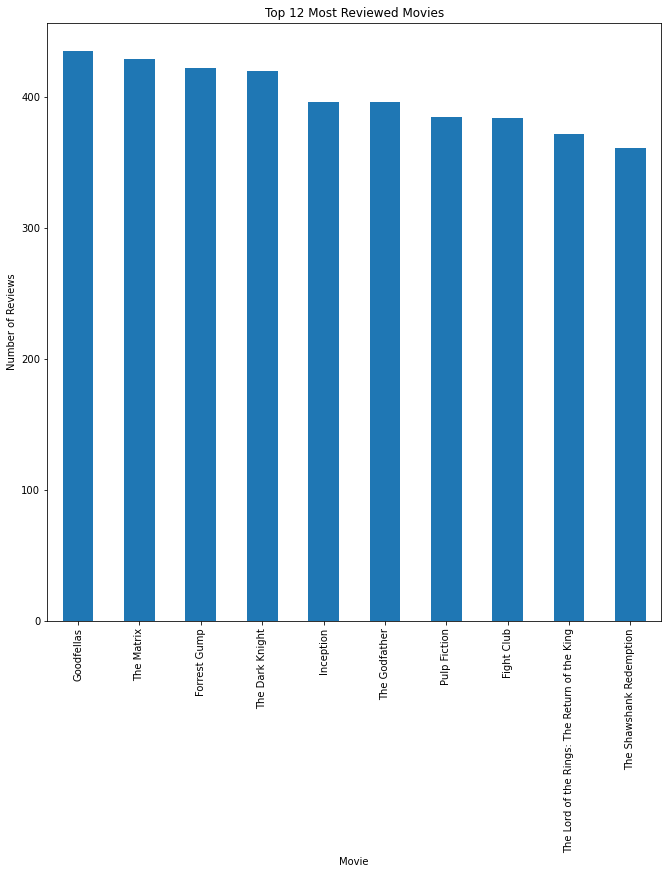

In [19]:
# Count reviews per movie
plt.figure(figsize=(11, 11))
movie_review_counts = movies_review['Movie'].value_counts().head(12)

# Plot most reviewed movies
movie_review_counts.plot(kind='bar')
plt.title('Top 12 Most Reviewed Movies')
plt.xlabel('Movie')
plt.ylabel('Number of Reviews')
plt.show()


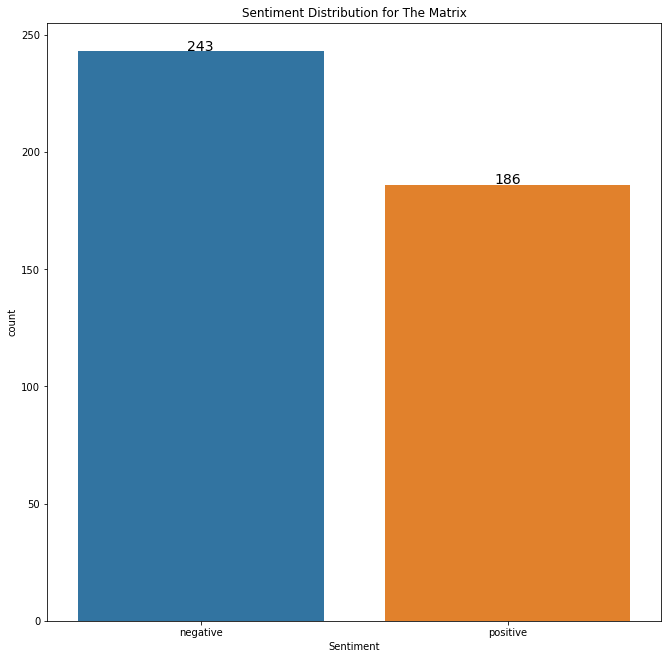

In [24]:
# Filter reviews for the specific movie
from textblob import TextBlob
specific_movie = 'The Matrix'
movies_review = movies_review[movies_review['Movie'] == specific_movie]

# Function to determine sentiment (assuming you have already created this function)
def get_sentiment(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity <= 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
movies_review['Sentiment'] = movies_review['Review'].apply(get_sentiment)

# Plot sentiment distribution
plt.figure(figsize=(11, 11))
sns.countplot(x='Sentiment', data=movies_review)
plt.title(f'Sentiment Distribution for {specific_movie}')

# Annotate count
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=14, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()

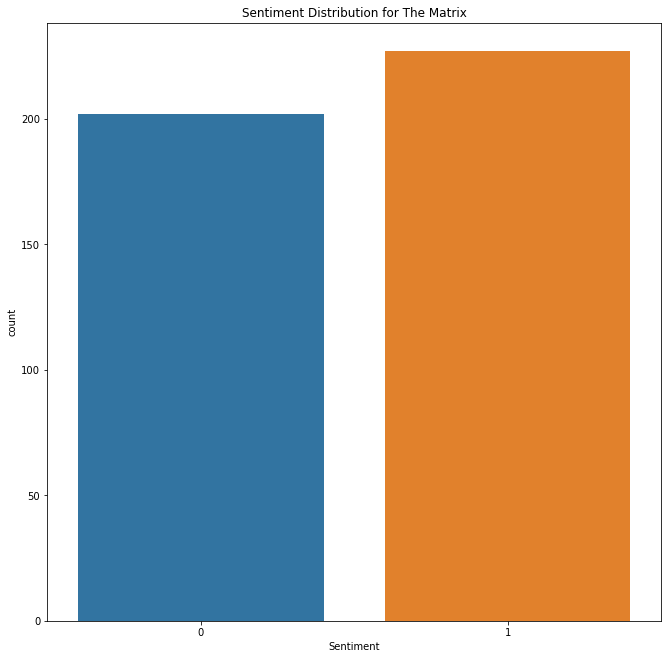

In [21]:
# Plot sentiment distribution for a specific movie (e.g., 'Movie A')
plt.figure(figsize=(11, 11))
specific_movie = 'The Matrix'
sns.countplot(x='Sentiment', data=movies_review[movies_review['Movie'] == specific_movie])
plt.title(f'Sentiment Distribution for {specific_movie}')
plt.show()



{'absolutely': 20, 'acting': 22, 'amazing': 30, 'best': 18, 'boring': 24, 'captivating': 24, 'cast': 26, 'cinematography': 30, 'couldn': 21, 'didn': 28, 'direction': 14, 'disappointing': 22, 'edge': 22, 'effects': 17, 'ending': 22, 'fantastic': 20, 'film': 37, 'great': 26, 'heartwarming': 15, 'highly': 18, 'incredible': 17, 'kept': 22, 'lacked': 19, 'laughing': 21, 'like': 28, 'mediocre': 22, 'movie': 101, 'movies': 18, 'originality': 19, 'outstanding': 18, 'performances': 26, 'plot': 56, 'poorly': 21, 'predictable': 28, 'recommend': 18, 'ruined': 14, 'screenplay': 21, 'seat': 22, 'seen': 18, 'soundtrack': 18, 'special': 17, 'stop': 21, 'storyline': 24, 'terrible': 14, 'touching': 15, 'twist': 28, 'uninteresting': 24, 've': 18, 'watching': 22, 'worth': 22, 'written': 21}


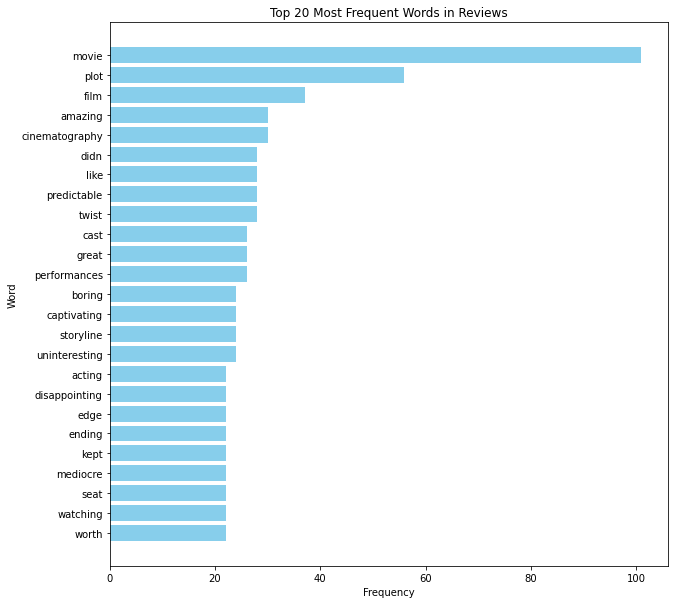

In [25]:
# Visualize the most frequent words in the reviews
count_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = count_vectorizer.fit_transform(movies_review['Review'])
words = count_vectorizer.get_feature_names_out()
word_frequencies = X.sum(axis=0).A1
word_freq_dict = dict(zip(words, word_frequencies))
sorted_word_freq = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)[:25]
print(word_freq_dict)

plt.figure(figsize=(10, 10))
plt.barh([x[0] for x in sorted_word_freq], [x[1] for x in sorted_word_freq], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 20 Most Frequent Words in Reviews')
plt.gca().invert_yaxis()
plt.show()


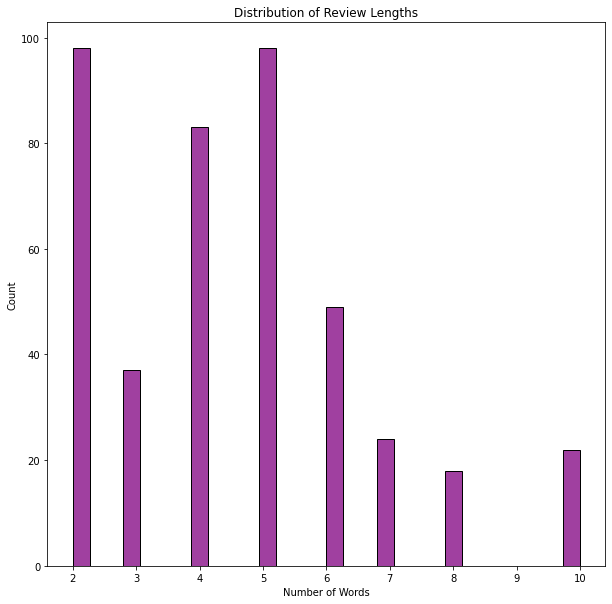

In [30]:
# Analyze the distribution of review lengths
review_lengths = movies_review['Review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 10))
sns.histplot(review_lengths, bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()